# Large Data Sets

Use the script twomil.sh to create a file twomil.csv that contains two million rows of numbers, each row containing an integer and its square separated by a comma. Lets see how to read it and plot it. The cell may take sometime to read the data but it does finish soon unlike Excel or other spreadsheet software. The next cell assumes that a file by the name twomil.csv is present in the working directory of the notebook.

In [1]:
import numpy as np

Uncomment the first line and comment the remaining lines once you have the file twomil.csv available in the current directory of the notebook.

In [2]:
d1 = np.arange(2000000)
d2 = d1**2
d = np.vstack((d1,d2)).transpose()
# d = np.loadtxt('twomil.csv', delimiter=',', usecols=(0,1))
d.shape

(2000000, 2)

It is not a good idea to plot all the data as it will take time. But python does the job quite soon. Uncomment the third line to make the plot and wait a few seconds to let it finish.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.plot(d[:,0], d[:,1], 'go')

## Binning

You can pick every Nth data point to plot or fit a function or do any kind of analysis. It is useful in quickly running your functions on the dataset without the delay of going through the whole dataset. The motivation to do binning is to reduce the dataset for checking out some function fast. In the example below, we pick only every 50,000th point to do the plotting. You will notice that the plot comes up quite fast and does represent the nature of the variation in the data without having to show all the points.

In [4]:
dbin = d[::50000]

In [5]:
dbin.shape

(40, 2)

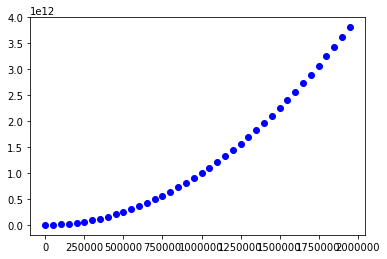

In [6]:
import matplotlib.pyplot as plt
plt.plot(dbin[:,0], dbin[:,1], 'bo')

# Parametric plots

You can make parametric plots that look nice and have a lot of mathematical significance. Here is one such example for what are known as Lissajous curves.

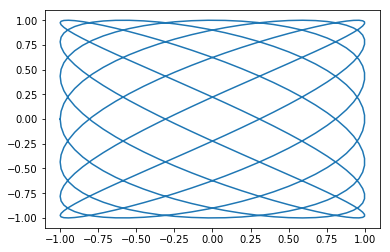

In [7]:
a = 7
b = 5
t = np.linspace(-np.pi, np.pi, 400)
x = np.sin(a*t + np.pi/2)
y = np.sin(b*t)
plt.plot(x,y)

# Linear Algebra

In [8]:
import numpy as np

In [9]:
A = np.random.rand(9)
A

array([0.12971168, 0.19920515, 0.2560254 , 0.24603609, 0.22253204,
       0.23039398, 0.21153136, 0.49532225, 0.57813092])

In [10]:
A.ndim, A.size, A.itemsize, A.nbytes, A.dtype

(1, 9, 8, 72, dtype('float64'))

In [11]:
B = A.reshape(3,3)

In [12]:
B

array([[0.12971168, 0.19920515, 0.2560254 ],
       [0.24603609, 0.22253204, 0.23039398],
       [0.21153136, 0.49532225, 0.57813092]])

In [13]:
np.linalg.matrix_rank(B)

3

In [14]:
np.linalg.det(B)

0.002407697813663786

We can determine the inverse of a matrix quite easily using the inv function of the sub-module linalg under numpy.

In [15]:
Binv = np.linalg.inv(B)
Binv

array([[  6.03621724,   4.83799069,  -4.60115312],
       [-38.83606896,   8.65263476,  13.75035456],
       [ 31.06479729,  -9.1834377 ,  -8.36760017]])

In [16]:
np.linalg.det(Binv)

415.334513461348

In [17]:
np.linalg.det(B) * np.linalg.det(Binv)

0.9999999999999999

We can verify that the product of a matrix and its inverse is the identity matrix "I" given below. The small numbers in the off diagonal positions are basically zero as you can notice from the precision of floating point representation for the datatype used.

In [18]:
np.dot(B,Binv)

array([[ 1.00000000e+00,  2.96863944e-16, -2.90344444e-16],
       [ 9.43815979e-18,  1.00000000e+00, -3.39944678e-17],
       [-1.47517584e-15, -4.78708932e-16,  1.00000000e+00]])

In [19]:
I = np.mat('1,0,0; 0,1,0; 0,0,1')
I

matrix([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [20]:
B.dtype

dtype('float64')

In [21]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

## Solving a linear set of equations

Solve the following three equations to obtain the values of $x$, $y$, $z$.

$$ x -2 y + z = 1 $$
$$ y - 4 z = 4 $$
$$ -4x + 5 y + 9 z = -13 $$

We can write this in matrix form.

$$ Px = Q $$

$P$ is a $n \times n$ matrix while $Q$ is a column matrix of length $n$.

In [22]:
P = np.mat('1, -2, 1; 0, 1, -4; -4, 5, 9')
P

matrix([[ 1, -2,  1],
        [ 0,  1, -4],
        [-4,  5,  9]])

In [23]:
Q = np.mat('1,4,-13').transpose()
Q

matrix([[  1],
        [  4],
        [-13]])

In [24]:
X = np.linalg.solve(P,Q)
X

matrix([[30.],
        [16.],
        [ 3.]])

We can now verify if this solution is correct.

In [25]:
np.dot(P,X)

matrix([[  1.],
        [  4.],
        [-13.]])

There are a lot more functionalities available in the linalg sub-module of numpy such as Trace, Eigen values, Eigen vectors and so on.

In [26]:
np.trace(B)

0.9303746349723833

In [27]:
np.linalg.eig(B)

(array([0.91663636+0.j        , 0.00686914+0.05078859j,
        0.00686914-0.05078859j]),
 array([[ 0.37429755+0.j        , -0.09308673+0.30467615j,
         -0.09308673-0.30467615j],
        [ 0.4089315 +0.j        ,  0.72903456+0.j        ,
          0.72903456-0.j        ],
        [ 0.83227181+0.j        , -0.58301444-0.16465138j,
         -0.58301444+0.16465138j]]))

# Memory representation of Arrays

For one dimensional arrays, there is no difference between the way arrays are stored in C (row major) or Fortran (column major). But there are two different ways of representing for higher dimensional arrays. Look at the output of flags feature of an array to know which way are the elements stored.

In [28]:
A.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

  * C_CONTIGUOUS means row-major indexing. While moving through the array, the second index is incremented first.
  * F_CONTIGUOUS means column-major indexing. R, Julia, MATLAB use column-major indexing. While moving through the array, the first index is incremented first.

## Timing the operations along row or column

The way the elements are accessed in an array will matter for the speed of computation depending on the stride. Longer stride takes a toll on the speed and one should watch that before crunching huge multi-dimensional data with complicated algorithms. Often, changing the way the elements of an array are stored in the memory could improve the performance of an algorithm.

Change the number of elements of the array C  from (100,100) to (10000,10000) and run the notebook locally to check the speed better. These numbers are kept small to ensure that github can render them on the web.

In [29]:
C = np.random.rand(100,100)
F = np.asfortranarray(C)

def sum_row(x):
    return np.sum(x[0,:])

def sum_col(x):
    return np.sum(x[:,0])

In [30]:
C.strides

(800, 8)

In [31]:
C.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [32]:
F.strides

(8, 800)

In [33]:
F.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

Use the magic command timeit to check how long it takes for the function to run on the array slice. Notice the difference in the time taken per loop for each of the two arrays.

Uncomment the lines in the next four cells and run them to see the output.

In [34]:
# %timeit sum_row(C)

In [35]:
# %timeit sum_col(C)

In [36]:
# %timeit sum_row(F)

In [37]:
# %timeit sum_col(F)

## Array operations

Many operators work element by element.

In [38]:
X = np.array([1,2,3])
Y = np.random.rand(3)

In [39]:
X

array([1, 2, 3])

In [40]:
Y

array([0.86797839, 0.93118468, 0.46185972])

In [41]:
X + 1

array([2, 3, 4])

In [42]:
Y * 2

array([1.73595677, 1.86236936, 0.92371944])

In [43]:
Y / X

array([0.86797839, 0.46559234, 0.15395324])

In [44]:
X * Y

array([0.86797839, 1.86236936, 1.38557916])

In [45]:
X ** 2

array([1, 4, 9])

Inner or Dot product of two vectors of length $n$ is defined as 
$$M = \sum_{i=0}^{i=n}{X[i] * Y[i]} $$

Using Einstein summation convention, this can be written as:

$$ M = X_i Y_i$$

In [46]:
np.dot(X,Y)

4.115926909546178

In [47]:
np.inner(X,Y)

4.115926909546178

Outer Product of two vectors is defined as:
$$Z[i,j] = X[i]*Y[j]$$

Using the summation convention, this can be written as:

$$ Z_{ij} = X_i Y_j$$

In [48]:
np.outer(X,Y)

array([[0.86797839, 0.93118468, 0.46185972],
       [1.73595677, 1.86236936, 0.92371944],
       [2.60393516, 2.79355404, 1.38557916]])

Cross product of two vectors is defined as:
$$ Z[i] = \sum_{j=1}^{j=n}{\sum_{k=1}^{k=n}{\epsilon[i,j,k] * X[j] * Y[k]}} $$

Where the Levi-Civita matrix $\epsilon_{ijk}$ is defined as 1 for cyclic indices, -1 for non-cyclic indices and 0 for indices with repitition.

Using the summation convention, this can be written as:

$$ Z_i = \epsilon_{ijk} X_j Y_k $$

In [49]:
np.cross(X,Y)

array([-1.8698346 ,  2.14207544, -0.80477209])

In [50]:
np.minimum(X,Y)

array([0.86797839, 0.93118468, 0.46185972])

In [51]:
np.min(X)

1

## Masked arrays

In [52]:
P = np.random.rand(5,5)
P

array([[0.63953403, 0.10535049, 0.11624549, 0.91165219, 0.92093277],
       [0.07610215, 0.16429519, 0.66623047, 0.37567763, 0.45031212],
       [0.51219038, 0.82104605, 0.64953545, 0.80515122, 0.19600152],
       [0.67954183, 0.07636704, 0.5795894 , 0.32262987, 0.12611501],
       [0.85767952, 0.85748422, 0.30015394, 0.32144494, 0.57766744]])

In [53]:
mask = (P < 0.5)

In [54]:
mask

array([[False,  True,  True, False, False],
       [ True,  True, False,  True,  True],
       [False, False, False, False,  True],
       [False,  True, False,  True,  True],
       [False, False,  True,  True, False]])

In [55]:
P [mask] = 0

In [56]:
P

array([[0.63953403, 0.        , 0.        , 0.91165219, 0.92093277],
       [0.        , 0.        , 0.66623047, 0.        , 0.        ],
       [0.51219038, 0.82104605, 0.64953545, 0.80515122, 0.        ],
       [0.67954183, 0.        , 0.5795894 , 0.        , 0.        ],
       [0.85767952, 0.85748422, 0.        , 0.        , 0.57766744]])

In [57]:
P.sum()

9.478234983054092

# Stacking of arrays

You can stack arrays to create bigger arrays for your work. There are various ways of stacking them.

### Stacking of 1D arrays

In [58]:
V1 = np.linspace(1,3,num=3)
V2 = V1**2
VCS = np.column_stack((V1, V2))
VCS

array([[1., 1.],
       [2., 4.],
       [3., 9.]])

In [59]:
VRS = np.row_stack((V1, V2))
VRS

array([[1., 2., 3.],
       [1., 4., 9.]])

### Stacking of 2D arrays

In [60]:
Q1 = np.linspace(1,9,num=9).reshape(3,3)
Q1

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [61]:
Q2 = Q1 ** 2

In [62]:
Q2

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [63]:
QH = np.hstack((Q1,Q2))
QH

array([[ 1.,  2.,  3.,  1.,  4.,  9.],
       [ 4.,  5.,  6., 16., 25., 36.],
       [ 7.,  8.,  9., 49., 64., 81.]])

In [64]:
QH.shape

(3, 6)

In [65]:
QC1 = np.concatenate((Q1,Q2), axis=1)
QC1

array([[ 1.,  2.,  3.,  1.,  4.,  9.],
       [ 4.,  5.,  6., 16., 25., 36.],
       [ 7.,  8.,  9., 49., 64., 81.]])

In [66]:
QC1.shape

(3, 6)

In [67]:
QV = np.vstack((Q1,Q2))
QV

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [68]:
QV.shape

(6, 3)

In [69]:
QC2 = np.concatenate((Q1,Q2), axis=0)
QC2

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [70]:
QC2.shape

(6, 3)

In [71]:
QD = np.dstack((Q1,Q2))
QD

array([[[ 1.,  1.],
        [ 2.,  4.],
        [ 3.,  9.]],

       [[ 4., 16.],
        [ 5., 25.],
        [ 6., 36.]],

       [[ 7., 49.],
        [ 8., 64.],
        [ 9., 81.]]])

In [72]:
QD.shape

(3, 3, 2)

In [73]:
QD.ndim

3